<a href="https://colab.research.google.com/github/SYH0213/sesac_miniproject/blob/main/sesac_miniproject_%EC%86%90%EC%9A%A9%ED%9B%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 76.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
#https://drive.google.com/file/d/1B4LI-kJWKJQbQFrBMo1sCkY2QIWycyHe/view?usp=sharing

In [ ]:
!pip install gdown -q
import gdown

# Get the file ID from the Google Drive link in the comment of cell n6E2mvS4iqFK
file_id = '1B4LI-kJWKJQbQFrBMo1sCkY2QIWycyHe'
output_filename = 'data.zip' # Assuming it's a zip file based on previous steps

gdown.download(id=file_id, output=output_filename, quiet=True)

'data.zip'

In [ ]:
import zipfile
import os

with zipfile.ZipFile('data.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

# Optional: list the contents of the extracted folder to verify
# print(os.listdir('.'))

In [ ]:
from ultralytics import YOLO

# Load the pre-trained YOLOv11m model
yolomodel = YOLO('yolo11m.pt')

In [ ]:
!#yolo task=detect mode=train model=yolo11m.pt data=data.yaml epochs=50 imgsz=640
!yolo task=detect mode=train model=yolo11m.pt data=data.yaml epochs=30 imgsz=640


Ultralytics 8.3.176 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22574MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=Fa

In [ ]:
from ultralytics import YOLO

# Load the trained model (replace 'path/to/your/best.pt' with the actual path to your trained model)
# The trained model is usually saved in runs/detect/trainX/weights/best.pt
trained_model_path = 'runs/detect/train/weights/best.pt' # Update this path if your run directory is different
model = YOLO(trained_model_path)

# Evaluate the model on the validation set
# The data argument should point to your dataset configuration file
evaluation_results = model.val(data='data.yaml') # Update 'data.yaml' if needed

# Display key performance metrics
print("Model Performance Metrics:")
print(f"  mAP50: {evaluation_results.results_dict['metrics/mAP50(B)']:.4f}")
print(f"  mAP50-95: {evaluation_results.results_dict['metrics/mAP50-95(B)']:.4f}")

Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22574MiB)
YOLO11m summary (fused): 125 layers, 20,034,658 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1115.3±648.4 MB/s, size: 30.9 KB)


val: Scanning /content/data/valid/labels.cache... 329 images, 0 backgrounds, 0 corrupt: 100%|██████████| 329/329 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.89it/s]


                   all        329        772      0.927       0.92      0.952      0.792
           paper_waste         74         78      0.884      0.885      0.927      0.739
           plastic_bag         27         44      0.802      0.736       0.82      0.571
            cup_noodle         50         74          1      0.981      0.995      0.993
       drink_container         68        129      0.958      0.961      0.989      0.809
            coffee_cup         61         61      0.952      0.971      0.991      0.848
                   cup         49        386      0.963      0.984      0.992      0.793
Speed: 0.6ms preprocess, 11.2ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/val
Model Performance Metrics:
  mAP50: 0.9523
  mAP50-95: 0.7922


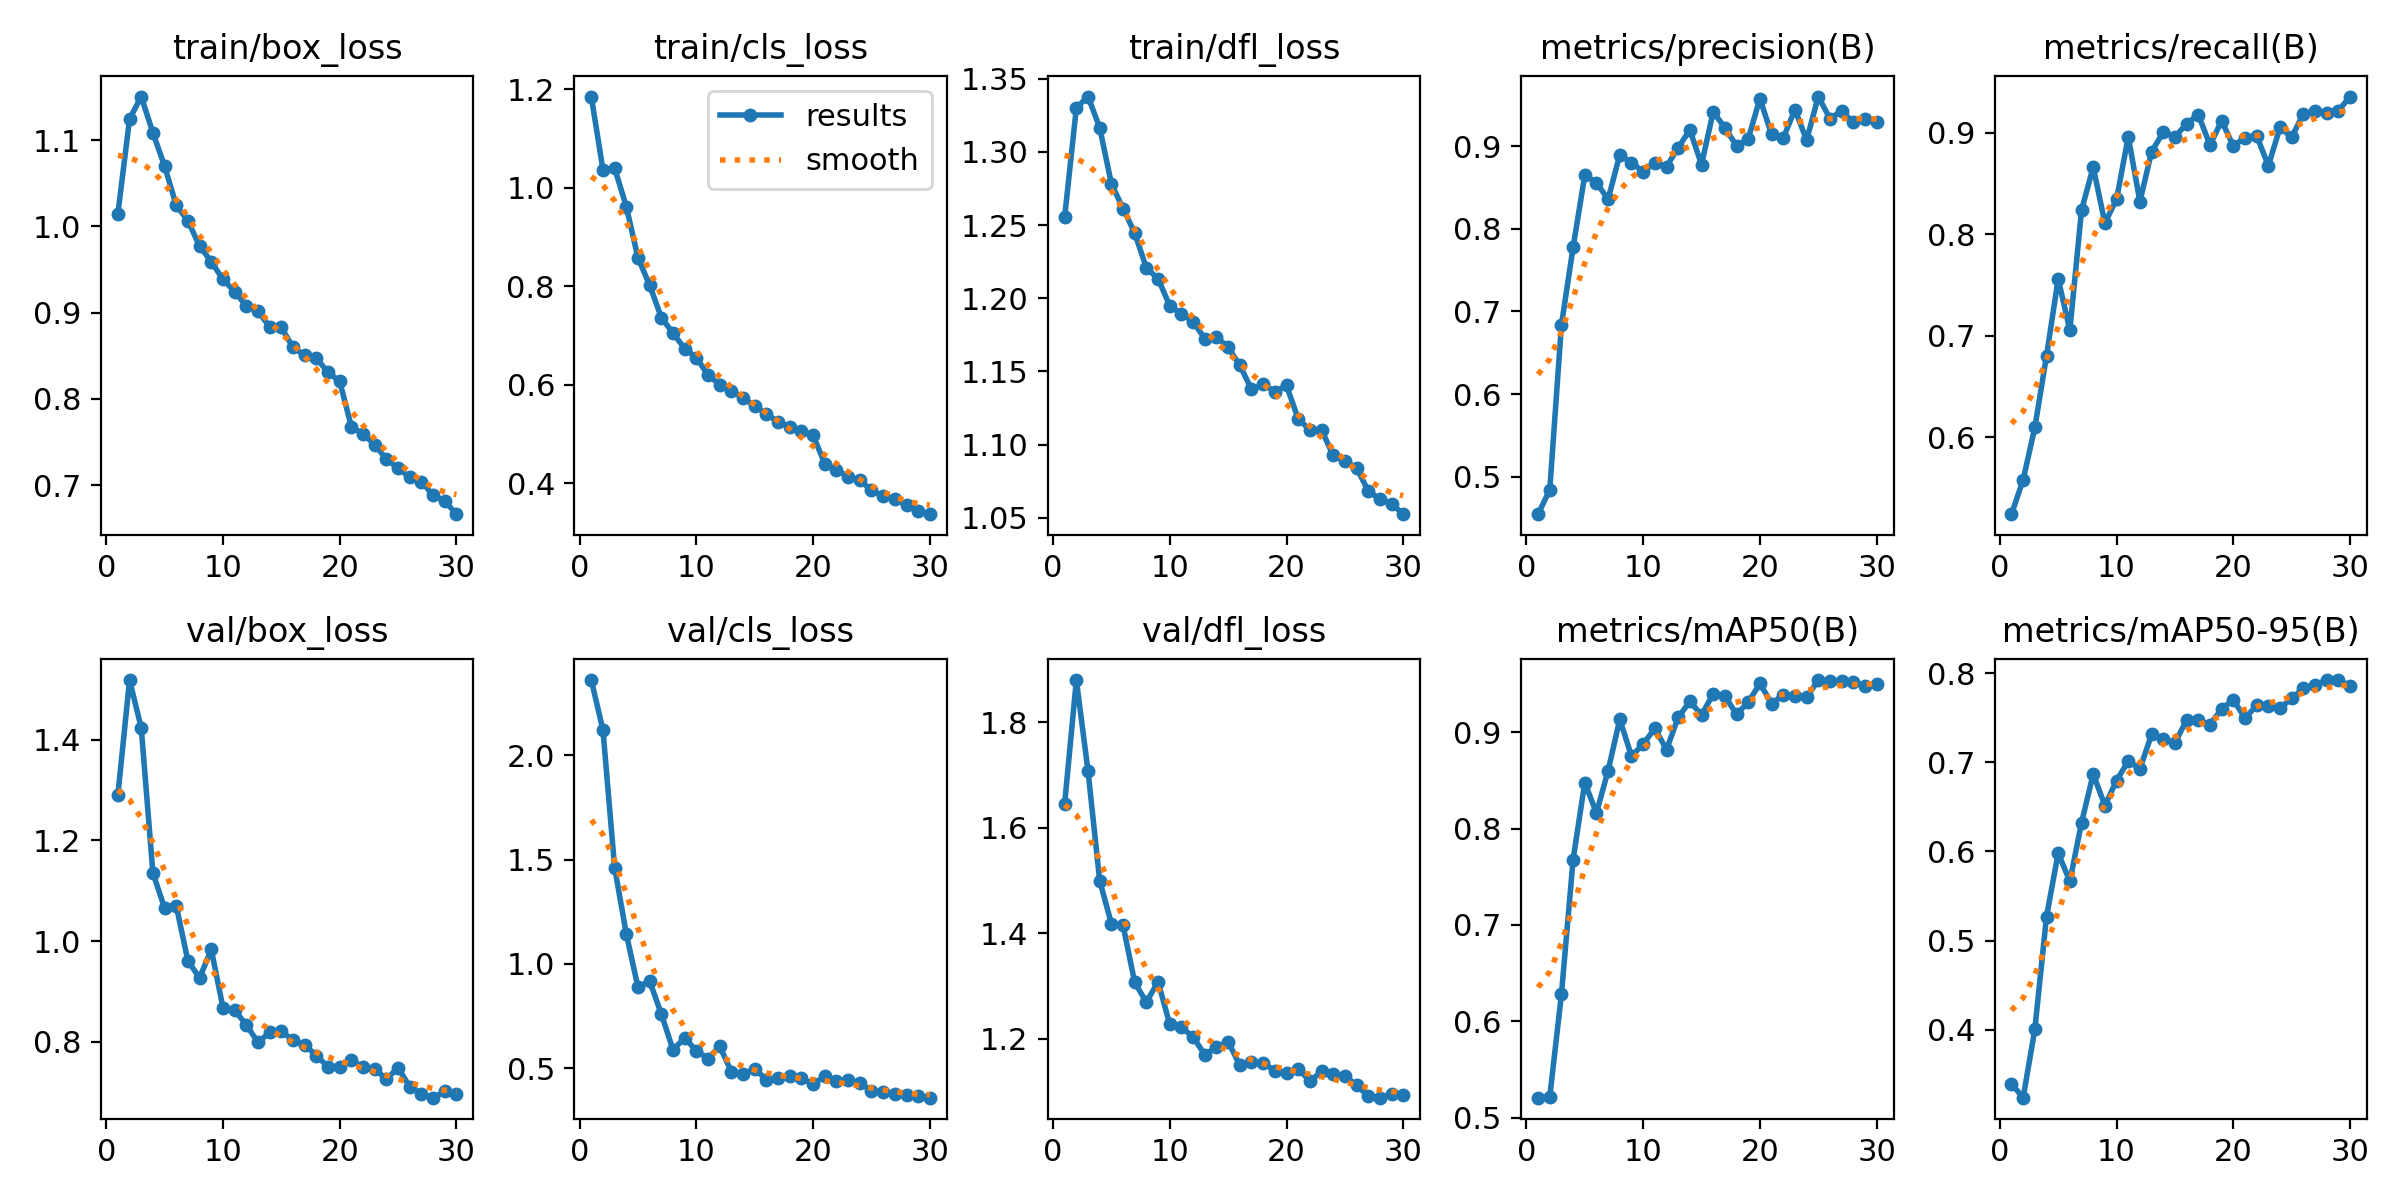

In [ ]:
from IPython.display import Image, display

# Replace 'runs/detect/train/results.png' with the actual path to your results.png file
results_image_path = 'runs/detect/train/results.png'

try:
    display(Image(filename=results_image_path))
except FileNotFoundError:
    print(f"Error: {results_image_path} not found. Please check the path to your training results.")

Saving KakaoTalk_20250804_092431012_03.jpg to KakaoTalk_20250804_092431012_03.jpg
Uploaded file saved as: /content/tempimg.jpg
Running inference on: /content/tempimg.jpg

image 1/1 /content/tempimg.jpg: 320x640 1 paper_waste, 74.5ms
Speed: 2.4ms preprocess, 74.5ms inference, 2.1ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs/detect/predict
Inference results saved to: /content/runs/detect/predict


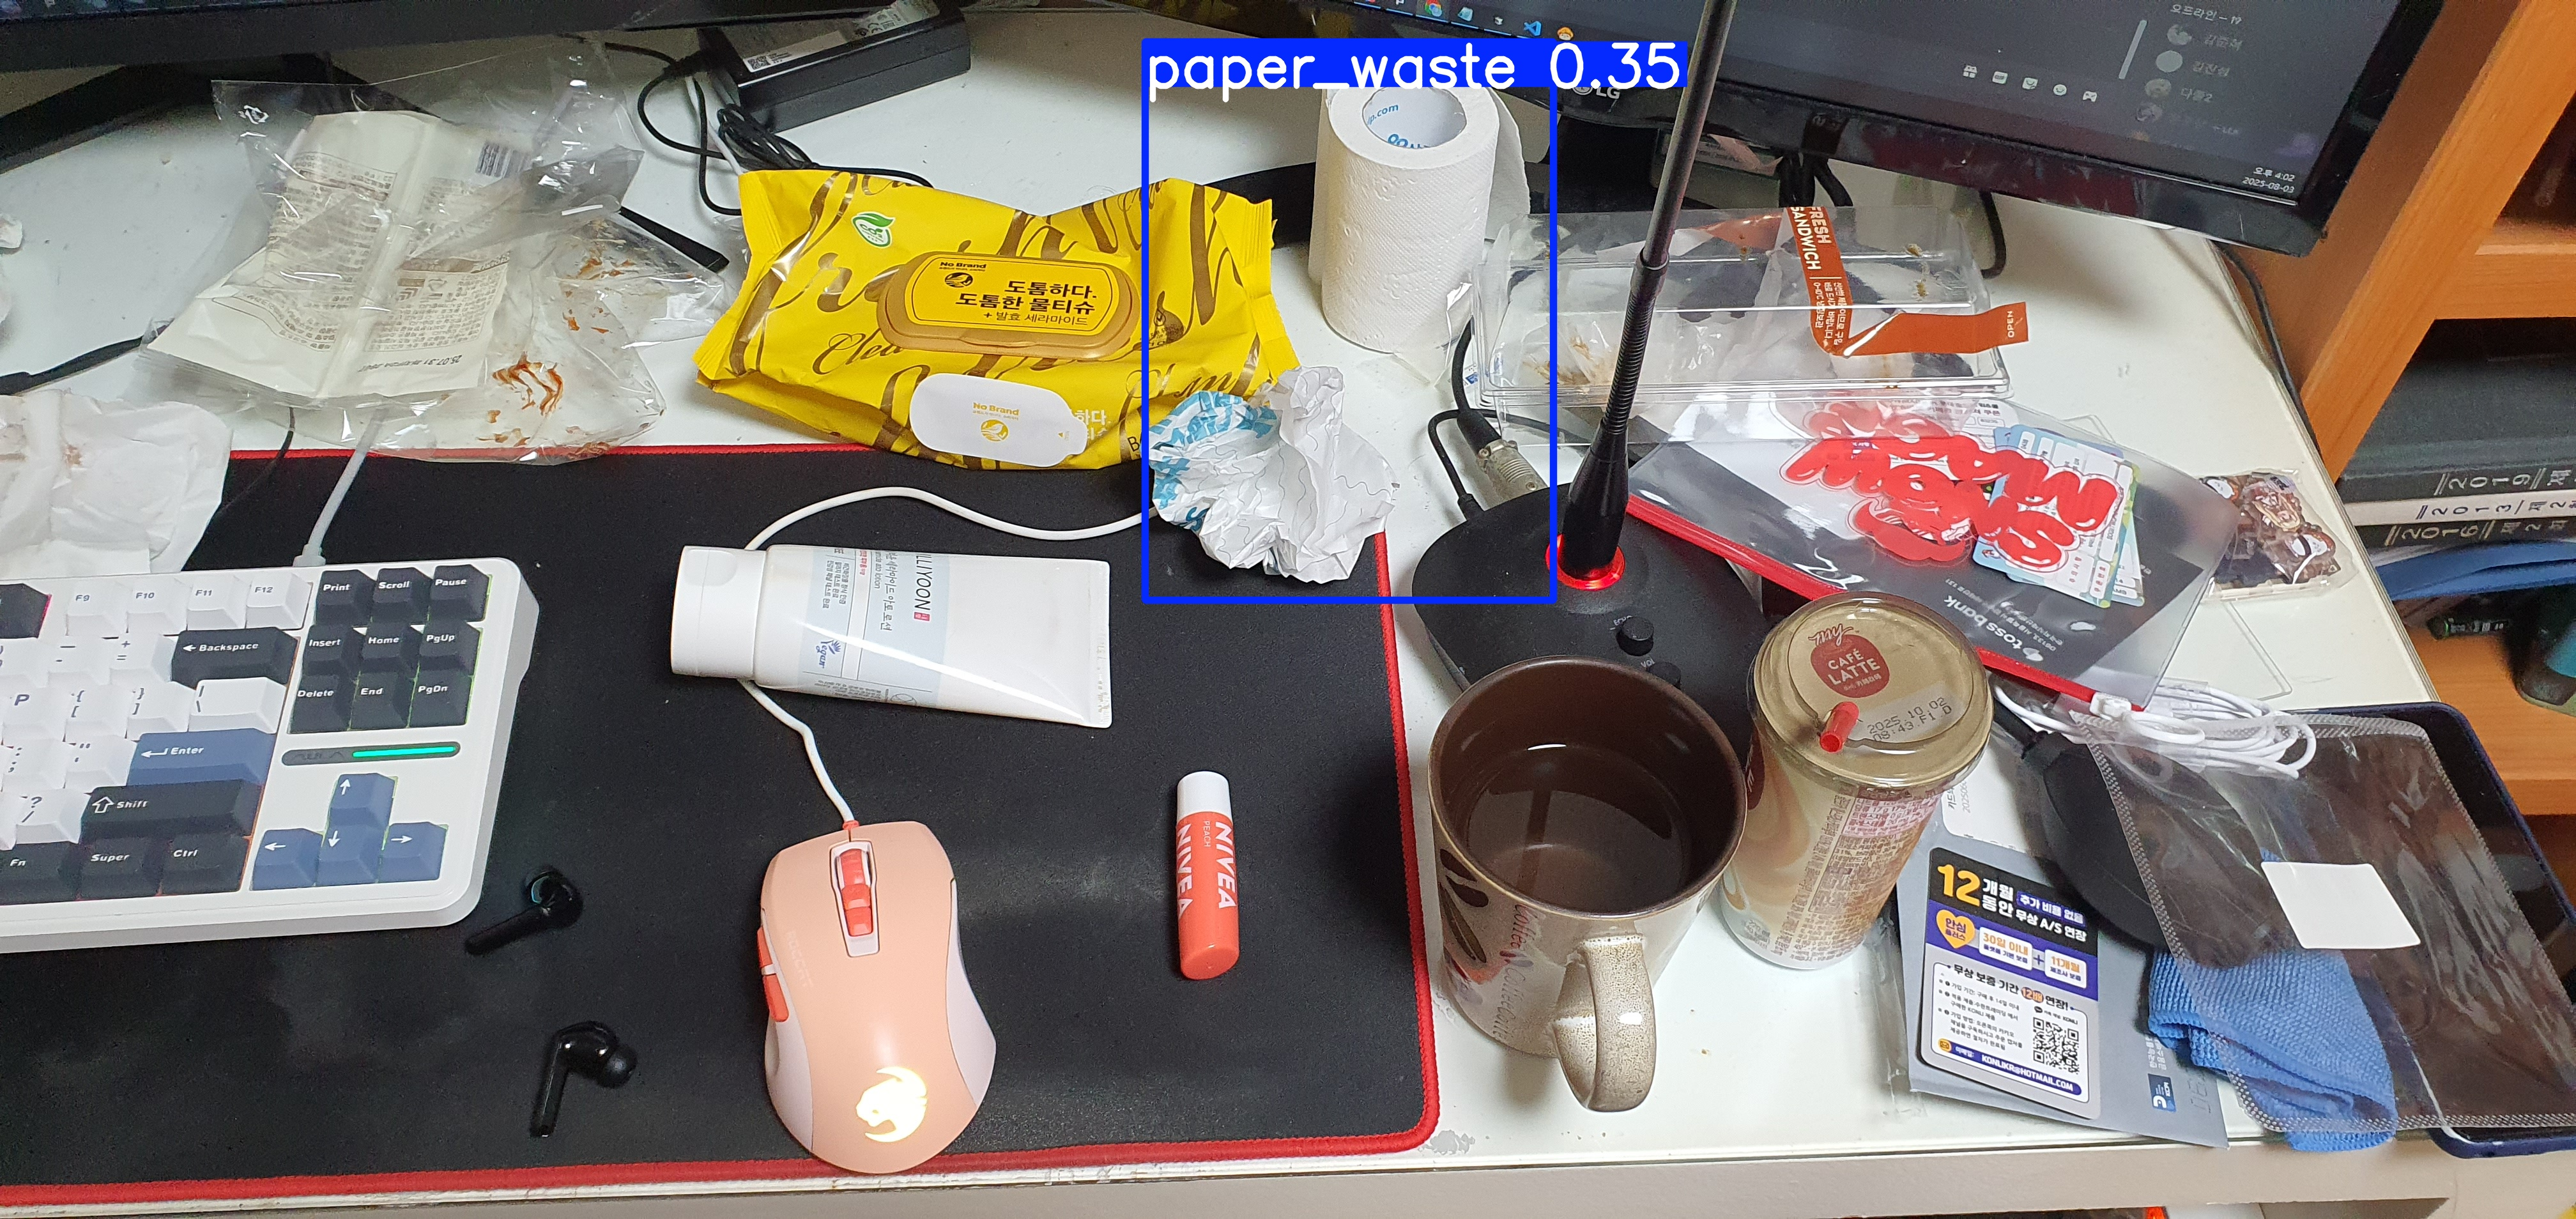

Deleting inference result directory: runs/detect/predict
Inference results deleted.
Deleted temporary image file: /content/tempimg.jpg


In [ ]:
from google.colab import files
from ultralytics import YOLO
from IPython.display import Image, display
import os
import shutil

# --- Upload an image ---
uploaded = files.upload()

# Get the filename of the uploaded image and define the target path
if uploaded:
    uploaded_filename = list(uploaded.keys())[0]
    temp_image_path = '/content/tempimg.jpg' # Define the target path as tempimg.jpg in /content

    # Rename the uploaded file to tempimg.jpg and move it to /content
    try:
        shutil.move(uploaded_filename, temp_image_path)
        print(f"Uploaded file saved as: {temp_image_path}")

        # Load the trained model
        # Make sure the path to your best.pt file is correct
        trained_model_path = 'runs/detect/train/weights/best.pt' # Update if your run directory is different

        if os.path.exists(trained_model_path):
            model = YOLO(trained_model_path)

            # --- Run inference on the temp image ---
            print(f"Running inference on: {temp_image_path}")

            # Run inference and save results
            # The 'save=True' will create a 'predict' directory with the result image
            results = model.predict(source=temp_image_path, save=True, imgsz=640)

            # Display the resulting image with detections
            # The results are saved in runs/detect/predictX by default.
            # Find the most recent predict run directory
            predict_dirs = [d for d in os.listdir('runs/detect') if d.startswith('predict')]
            latest_predict_dir = sorted(predict_dirs)[-1] if predict_dirs else None

            if latest_predict_dir:
                 result_image_name = os.path.basename(temp_image_path) # The result image will have the same name
                 result_image_path = os.path.join('runs/detect', latest_predict_dir, result_image_name)

                 if os.path.exists(result_image_path):
                     print(f"Inference results saved to: {os.path.abspath(os.path.join('runs/detect', latest_predict_dir))}")
                     display(Image(filename=result_image_path))
                 else:
                     print(f"Error: Result image not found at {result_image_path}.")

                 # --- Clean up the individual predict directory after displaying ---
                 print(f"Deleting inference result directory: runs/detect/{latest_predict_dir}")
                 shutil.rmtree(os.path.join('runs/detect', latest_predict_dir), ignore_errors=True)
                 print("Inference results deleted.")

            else:
                print("No 'predict' directories found in runs/detect after inference.")

        else:
            print(f"Error: Trained model not found at {trained_model_path}. Please update the path.")

    except Exception as e:
        print(f"An error occurred while moving the file: {e}")

    finally:
        # --- Delete the temp image file ---
        if os.path.exists(temp_image_path):
            os.remove(temp_image_path)
            print(f"Deleted temporary image file: {temp_image_path}")


else:
    print("No file was uploaded.")